# Example of using ioh-explainer

First we need to define the configuration space of an algorithm. We take a standard PSO algorithm as example.

In [1]:
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

from ioh_explainer import explainer
#import pyswarms as ps
from modde import ModularDE, Parameters
import numpy as np
from ConfigSpace import ConfigurationSpace
from ConfigSpace.util import generate_grid
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import autokeras as ak

cs = ConfigurationSpace({
    "F": (0.05, 2.0),              # Uniform float
    "CR" : (0.05, 1.0),            # Uniform float
    "lambda_": (1, 20)             # Uniform int
})

steps_dict = {
    "F": 20, 
    "CR" : 10,
    "lambda_": 5
}

def run_de(func, config, budget, dim, *args, **kwargs):
    item = {'F': np.array([float(config.get('F'))]), 'CR':np.array([float(config.get('CR'))]),  'lambda_' : int(config.get('lambda_'))*dim }
    item['budget'] = int(budget)
    c = ModularDE(func, **item)
    try:
        c.run()
        return []
    except Exception as e:
        print(f"Found target {func.state.current_best.y} target, but exception ({e}), so run failed")
        return []

de_explainer = explainer(run_de, 
                 cs , 
                 dims = [5,10],#,10,40],#, 10, 20, 40 
                 fids = [1,5],#,5,7,13,18,20,23], #,5
                 iids = 5, #20 
                 reps = 5, 
                 sampling_method = "random",  #or random
                 grid_steps_dict = steps_dict,
                 sample_size = 100,  #only used with random method
                 budget = 10000, #10000
                 seed = 1,
                 verbose = True)


2023-08-01 16:45:36.590145: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-01 16:45:36.592003: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-01 16:45:36.631503: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-01 16:45:36.633149: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-01 16:45:37.157965: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

Using TensorFlow backend


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 2: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 3: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write to console]: 
 
R[write to console]:  libraries ‘/usr/local/lib/R/site-library’, ‘/usr/lib/R/site-library’ contain no packages

R[write to console]: 4: 
R[write to console]: In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
R[write t

In [2]:
if False:
    de_explainer.run(paralell=True)
    #de_explainer.save_results("de_results.pkl")

Evaluating 100 configurations.


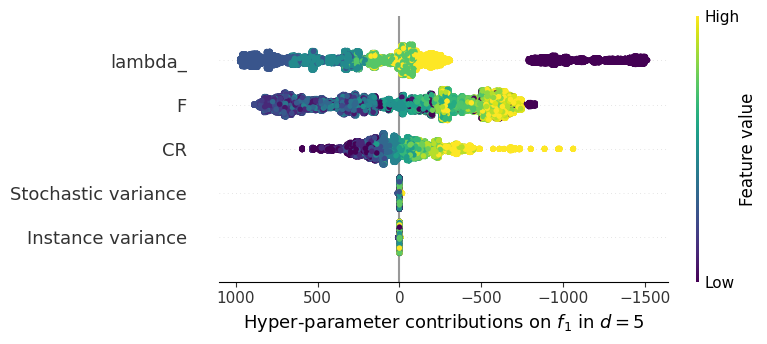

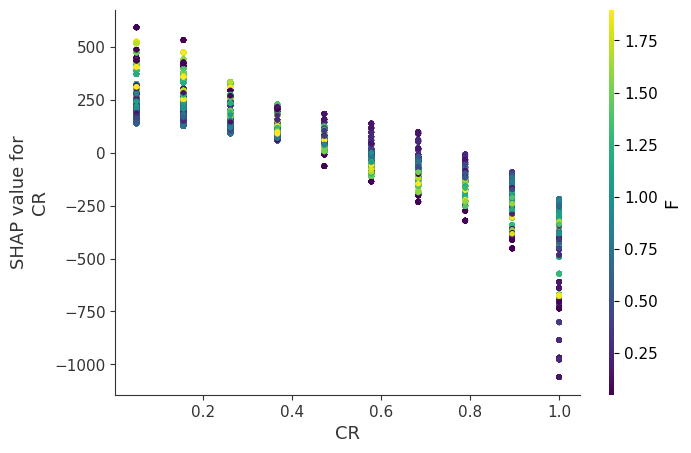

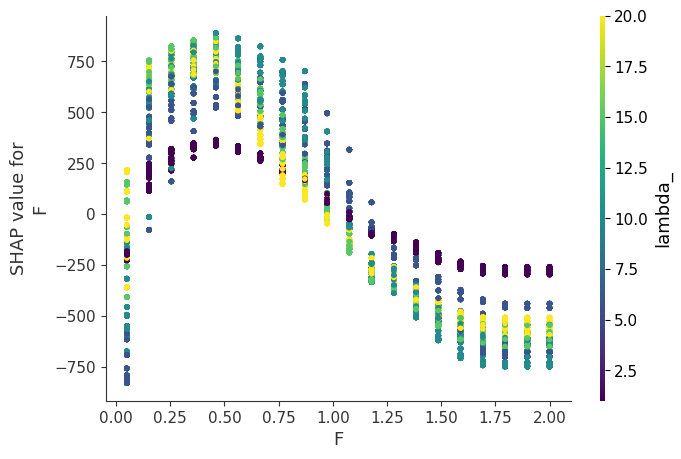

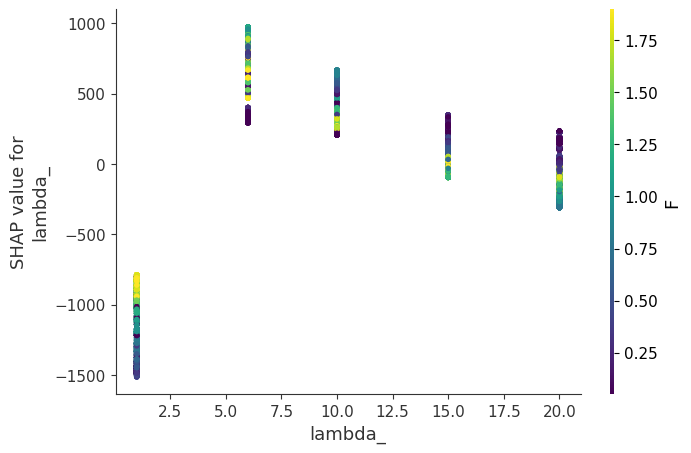

best config  CR         1.000000
F          1.692105
lambda_    1.000000
Name: 98834, dtype: float64 with auc  3827.3333333326073
Running 100 evaluations on f0 for bias detection..


2023-08-01 16:46:03.972323: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Warning! Single best configuration shows structural bias of type bounds.


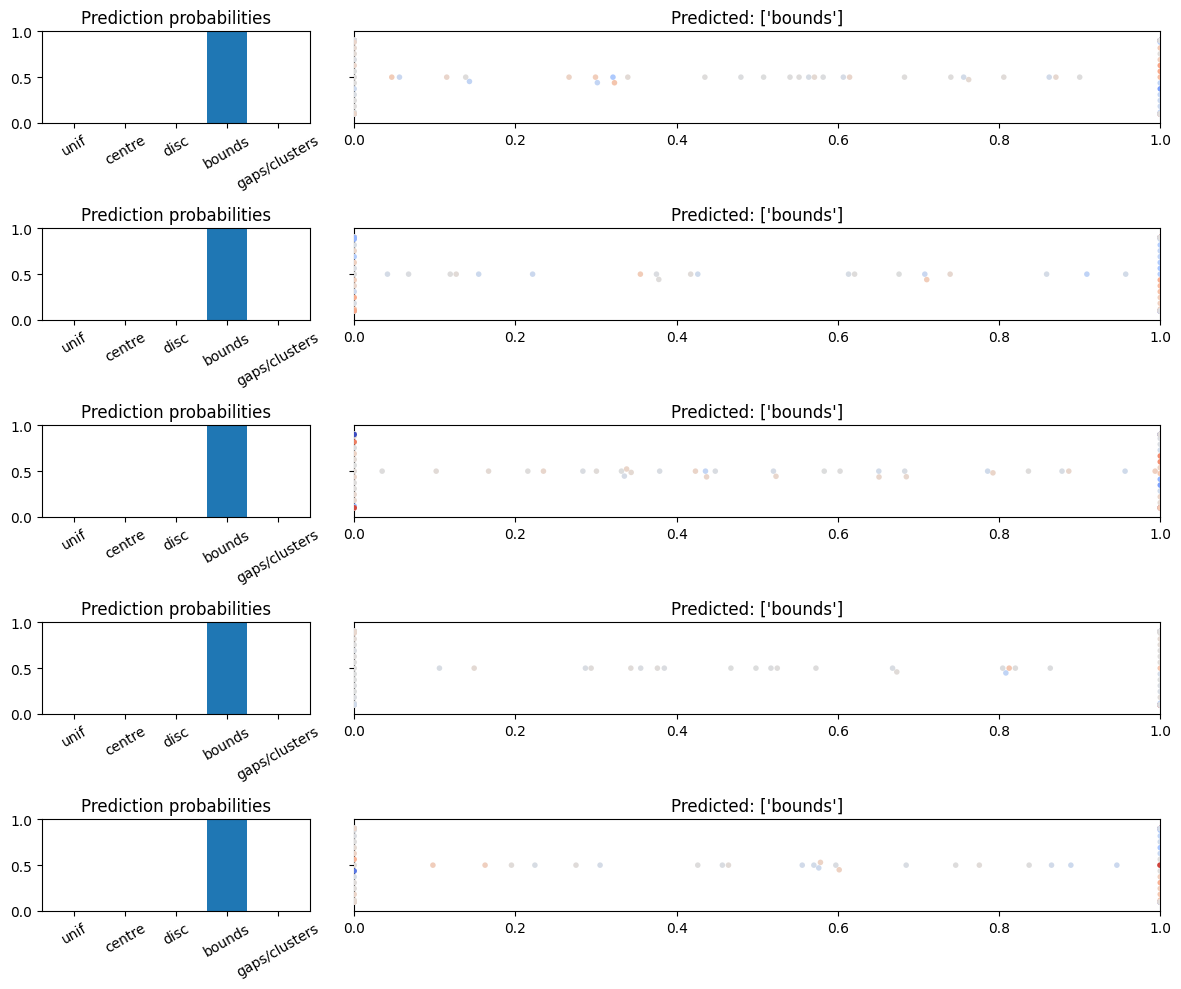

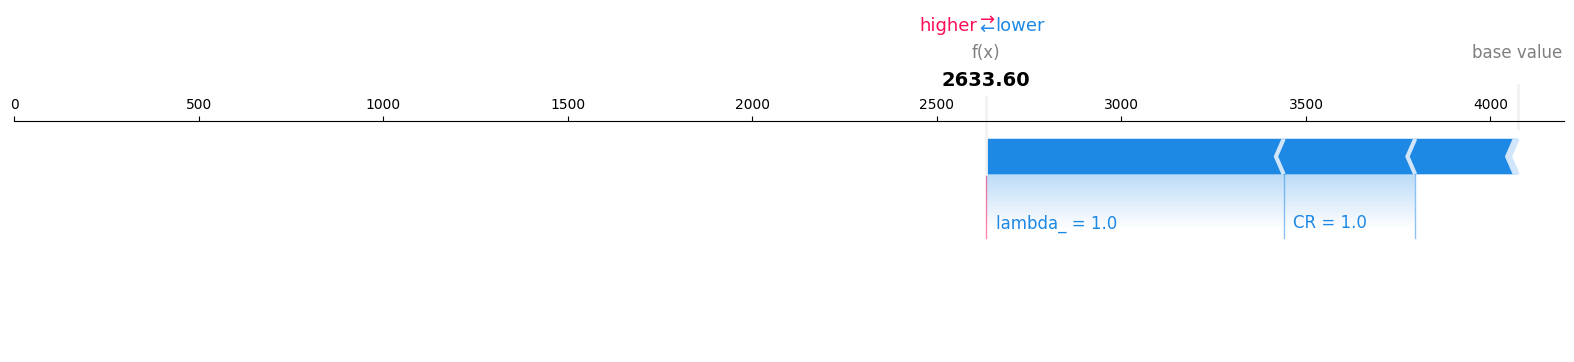

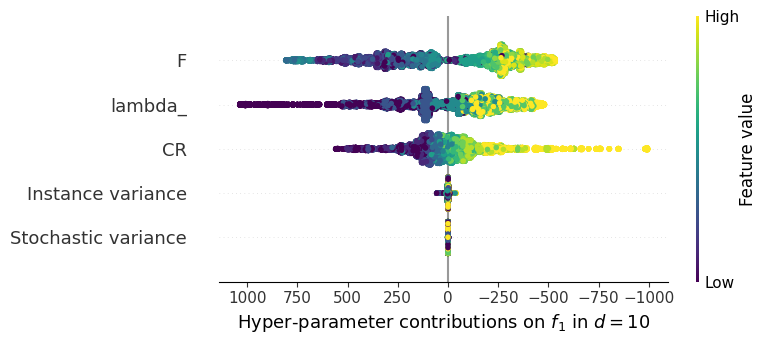

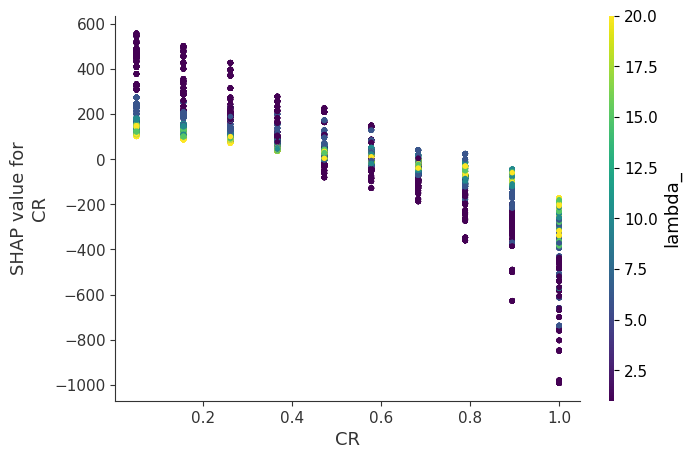

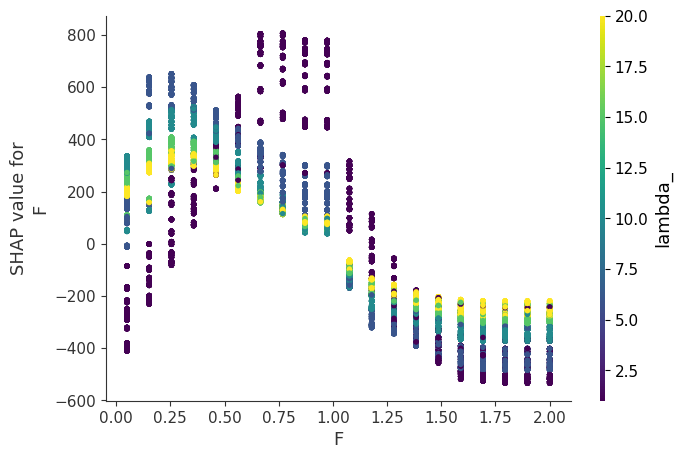

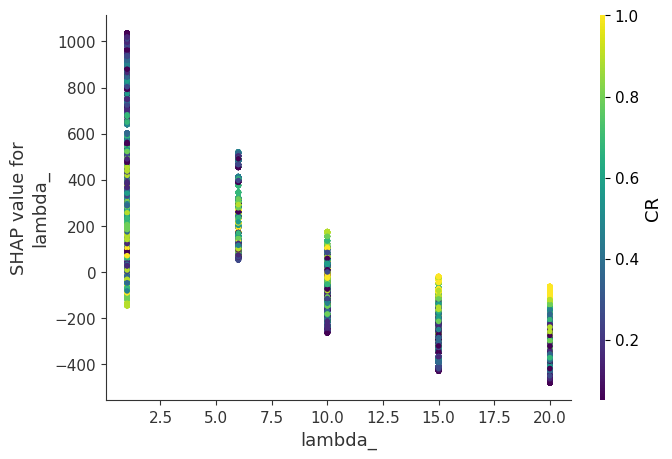

best config  CR         1.00
F          0.05
lambda_    1.00
Name: 90881, dtype: float64 with auc  3704.333333334007
Running 100 evaluations on f0 for bias detection..


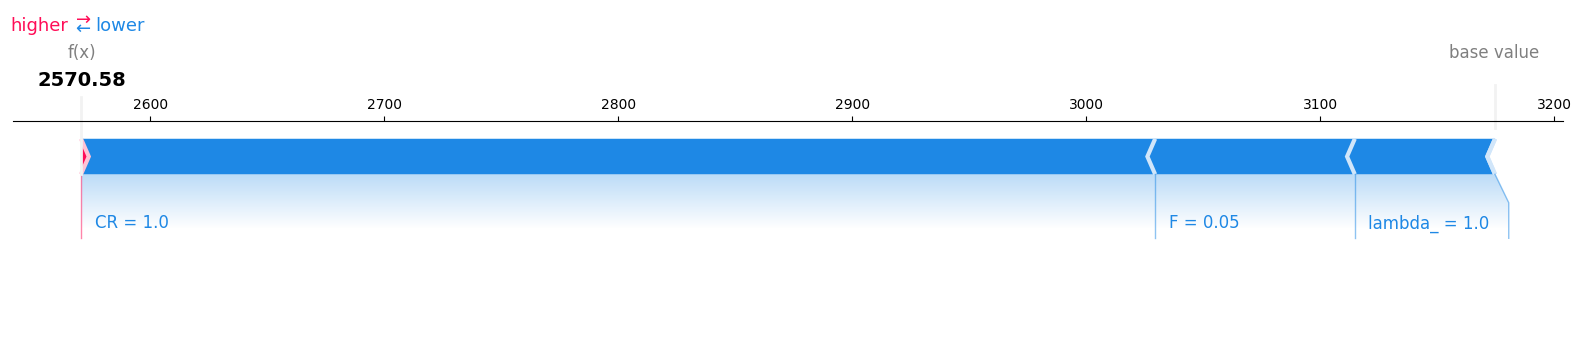

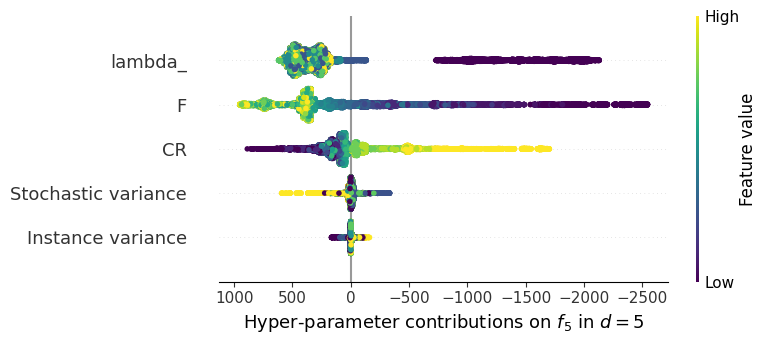

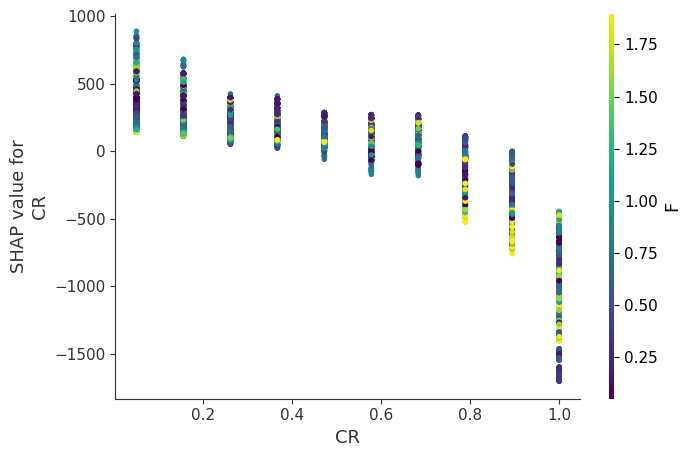

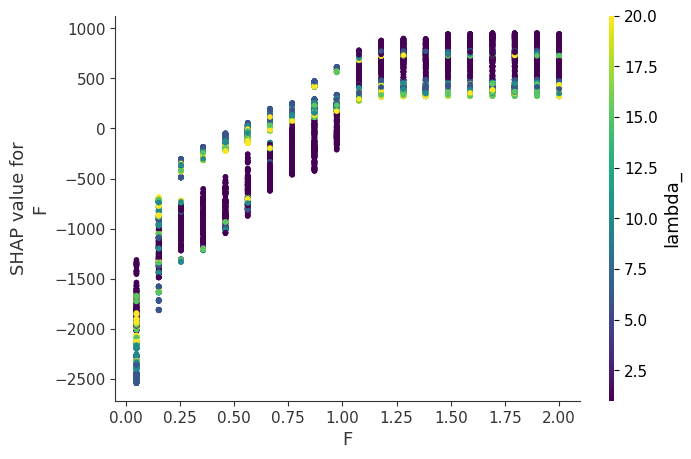

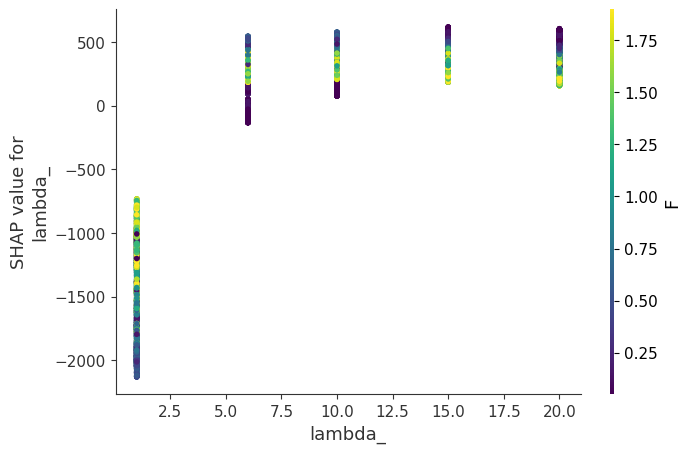

best config  CR         0.366667
F          0.050000
lambda_    1.000000
Name: 30847, dtype: float64 with auc  3704.333333334007
Running 100 evaluations on f0 for bias detection..


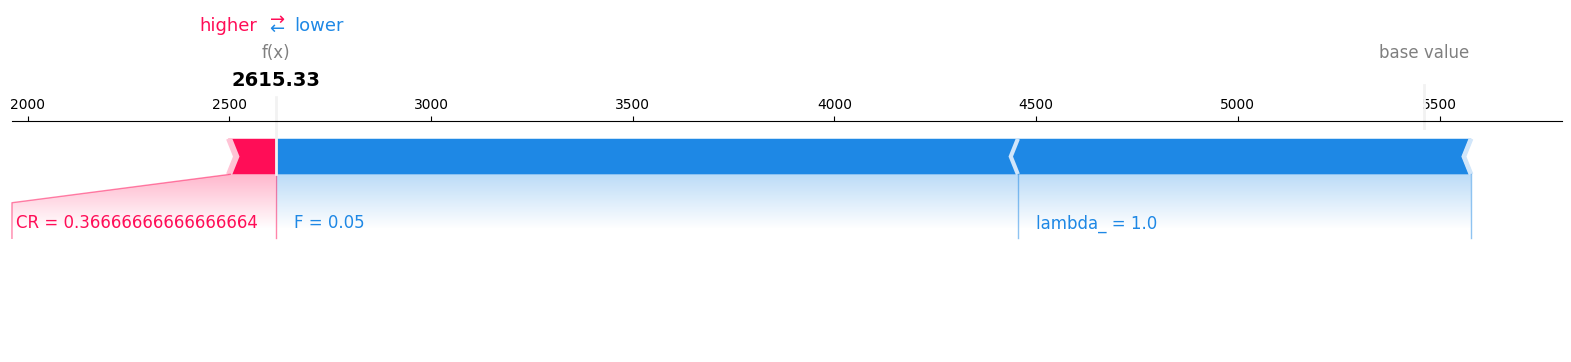

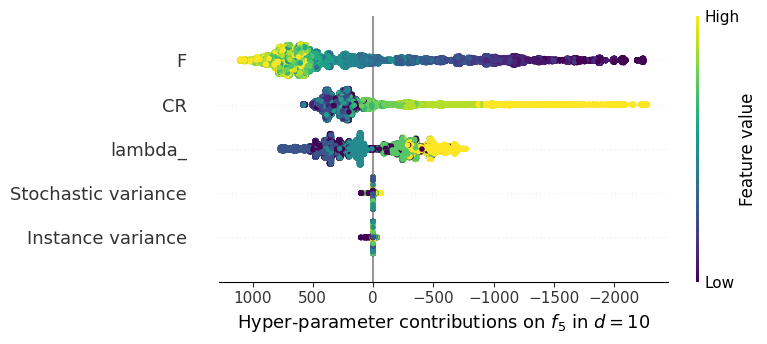

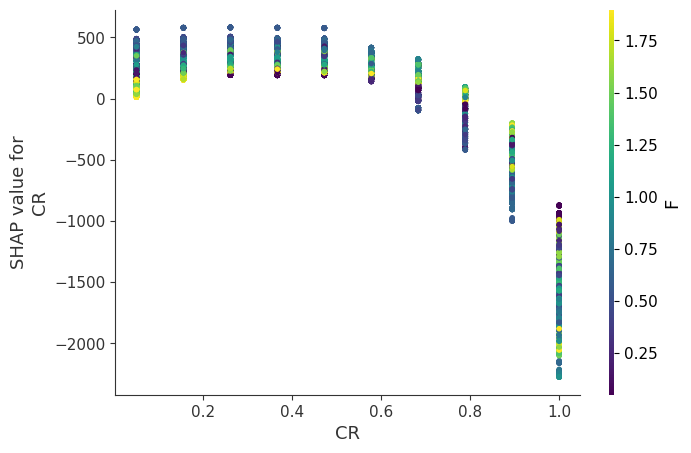

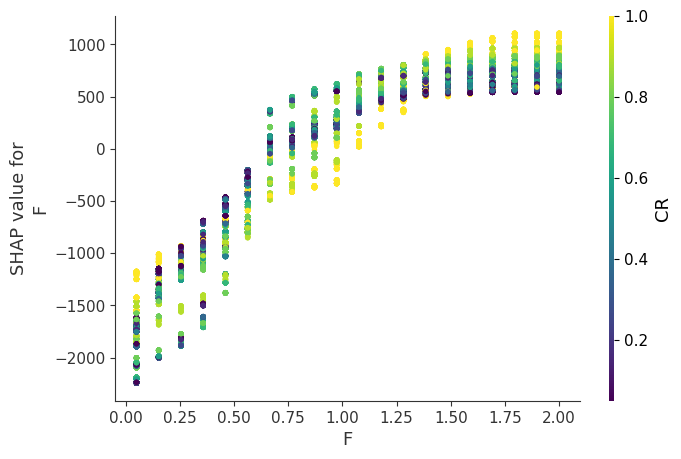

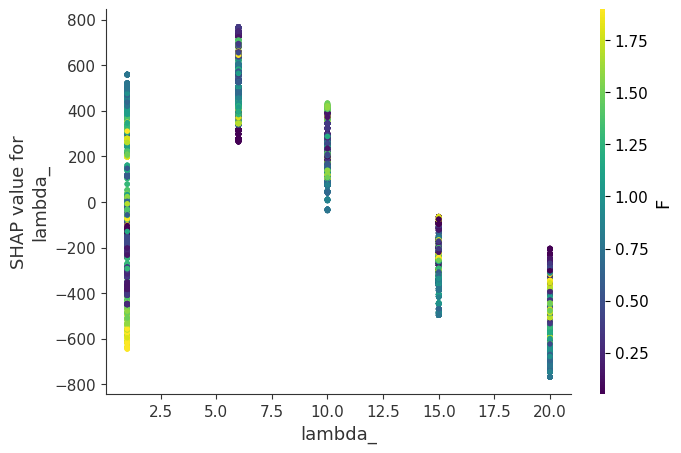

best config  CR         1.00
F          0.05
lambda_    1.00
Name: 90899, dtype: float64 with auc  3580.864197532862
Running 100 evaluations on f0 for bias detection..


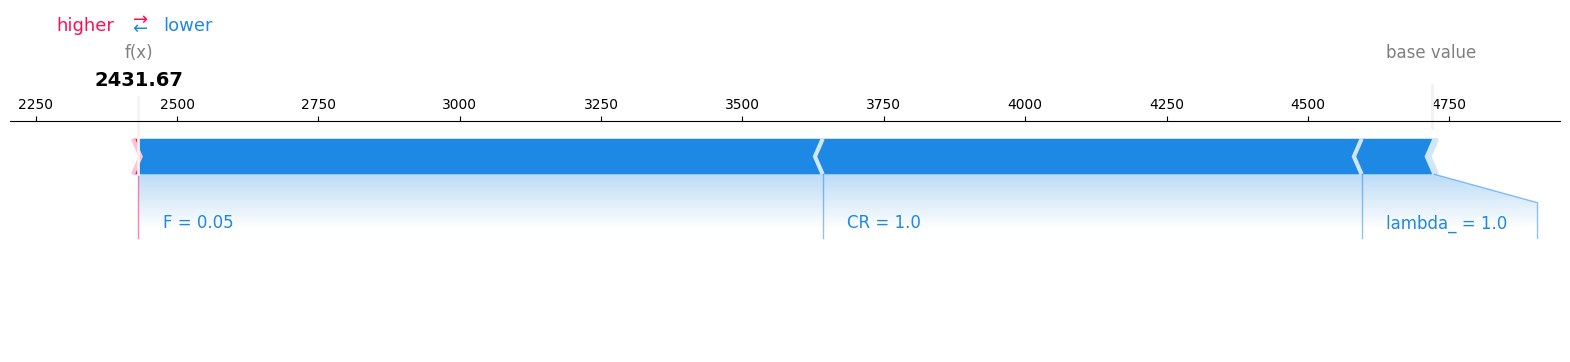

In [3]:
de_explainer.load_results("de_results.pkl")
de_explainer._create_grid()

x = de_explainer.df[(de_explainer.df['fid'] == 1) & (de_explainer.df['dim'] == 5)][["F","CR","lambda_"]].to_numpy()

#y = de_explainer.df[(de_explainer.df['fid'] == 1) & (de_explainer.df['dim'] == 5)]["auc"].to_numpy()
#np.savetxt("sobol/x.csv", x)
#np.savetxt("sobol/y.csv", y)

de_explainer.plot()
